# Introduction to Dataset
Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# Task 1: Initial Data Exploration

In [1]:
# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read csv dataset with pandas

In [4]:
df = pd.read_csv("1. Data/supermarket_sales.csv")

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [8]:
# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Set "Date" column as index
df.set_index('Date', inplace = True)

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
# Calculate summary statistics

In [12]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.131488e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


# Task 2: Univariate Analysis

In [13]:
# Question 1: What does the distribution of customer rating looks like? Is it skewed?

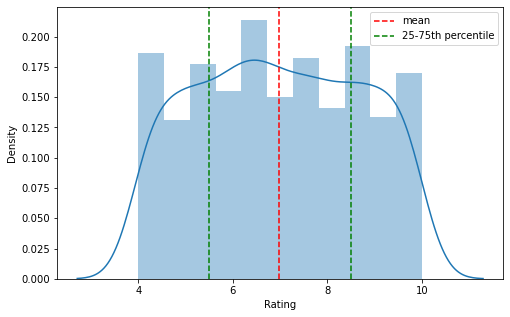

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(df['Rating'])

# Add a vertical line across the Axes.
plt.axvline(x = np.mean(df['Rating']), c='red', ls='--', label ='mean')
plt.axvline(x = np.percentile(df['Rating'], 25), c='green', ls='--', label ='25-75th percentile')
plt.axvline(x = np.percentile(df['Rating'], 75), c='green', ls='--')
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

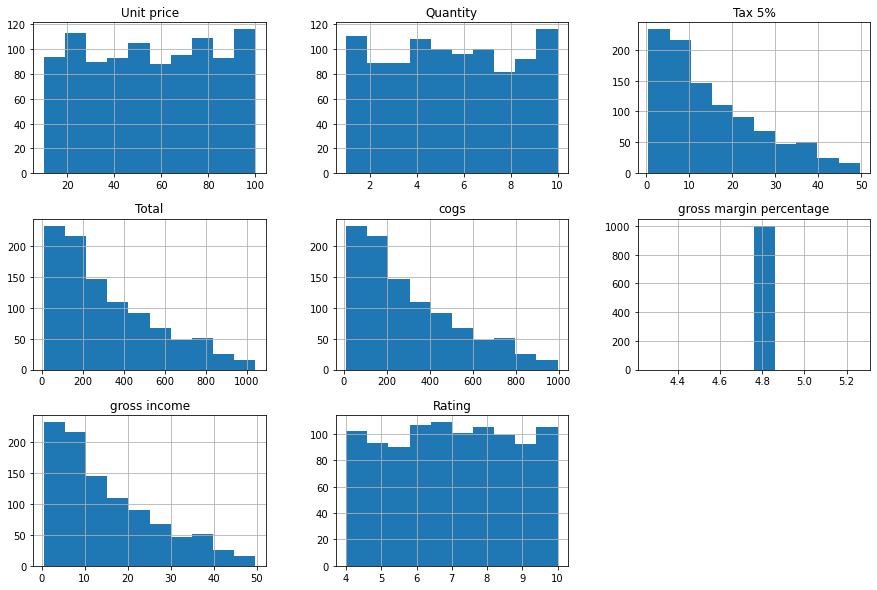

In [15]:
# Plot histogram of all variables at once.
df.hist(figsize = (15,10))

In [16]:
# Question 2: Do aggregate sales numbers differ by much between branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

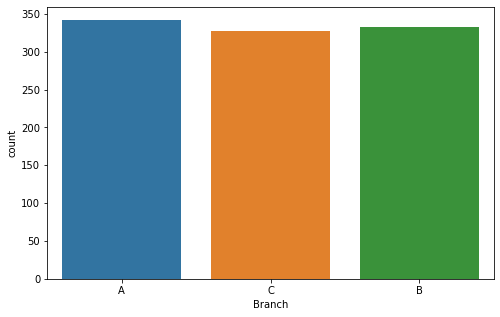

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(df['Branch'])

In [18]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

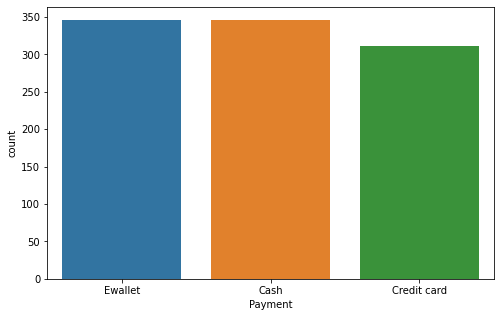

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(df['Payment'])

# Task 3: Bivariate Analysis

In [20]:
# Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

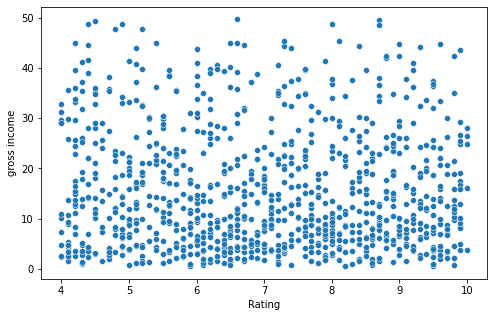

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Rating', y = 'gross income', data = df)

In [22]:
# Use regplot to show a regression line

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

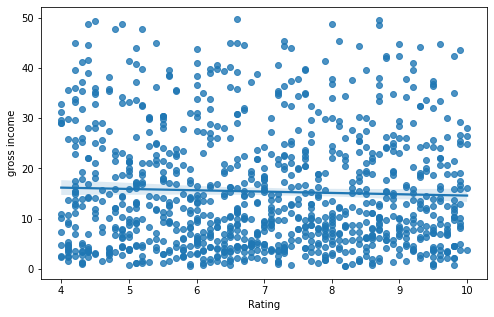

In [23]:
plt.figure(figsize=(8,5))
sns.regplot(x = 'Rating', y = 'gross income', data = df)

#### Look's like there is no relationship between "gross income" and "Rating".

In [24]:
# Show the relationship between "gross income" and "Branch"

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

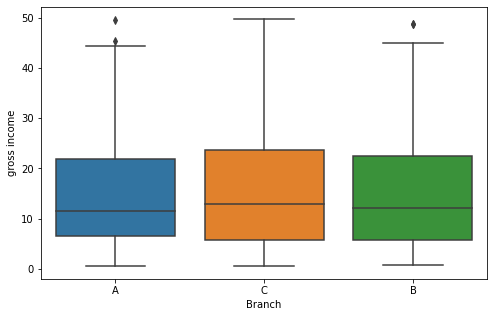

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'Branch', y = 'gross income', data = df)

#### All branches has about the same "gross income".

In [26]:
# Is there a noticeable relationship between "Gender" and "gross income"?

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

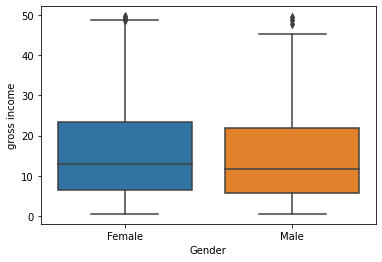

In [27]:
sns.boxplot(x = 'Gender', y = 'gross income', data = df)

#### Look's like male and female spent about the same.

In [28]:
# Drop unimportant columns

In [29]:
drop_cols = ["Invoice ID", "Branch", "City", "Customer type", 
             "Gender", "Product line", "Time", "Payment"]

In [30]:
df.drop(drop_cols, axis=1, inplace=True)

In [31]:
df.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-05,74.69,7.0,26.1415,548.9715,522.83,4.761905,26.1415,9.1
2019-03-08,15.28,5.0,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2019-03-03,46.33,7.0,16.2155,340.5255,324.31,4.761905,16.2155,7.4
2019-01-27,58.22,8.0,23.2880,489.0480,465.76,4.761905,23.2880,8.4
2019-02-08,86.31,7.0,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [32]:
# Is there a noticeable time trend in gross income?

In [33]:
# As there are multiple rows with same "Date", use groupby function to group the same date.
df = df.groupby(df.index).mean()
df.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333


In [35]:
# Define x and y variable for line plot
x = df.groupby(df.index).mean().index
y = df.groupby(df.index).mean()['gross income']

<AxesSubplot:xlabel='Date', ylabel='gross income'>

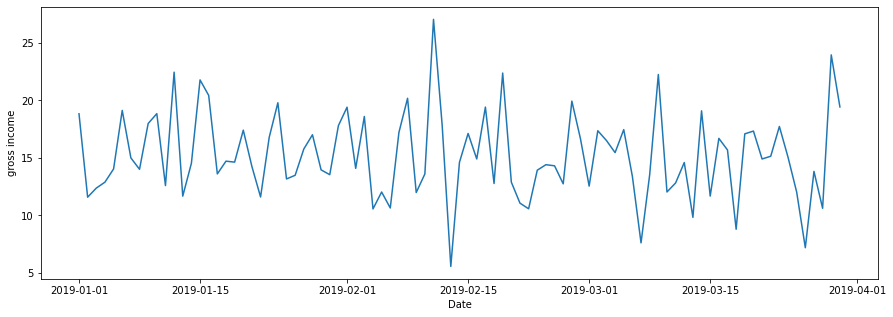

In [36]:
plt.figure(figsize = (15,5))
sns.lineplot(x, y)

In [42]:
# Create a pairplot

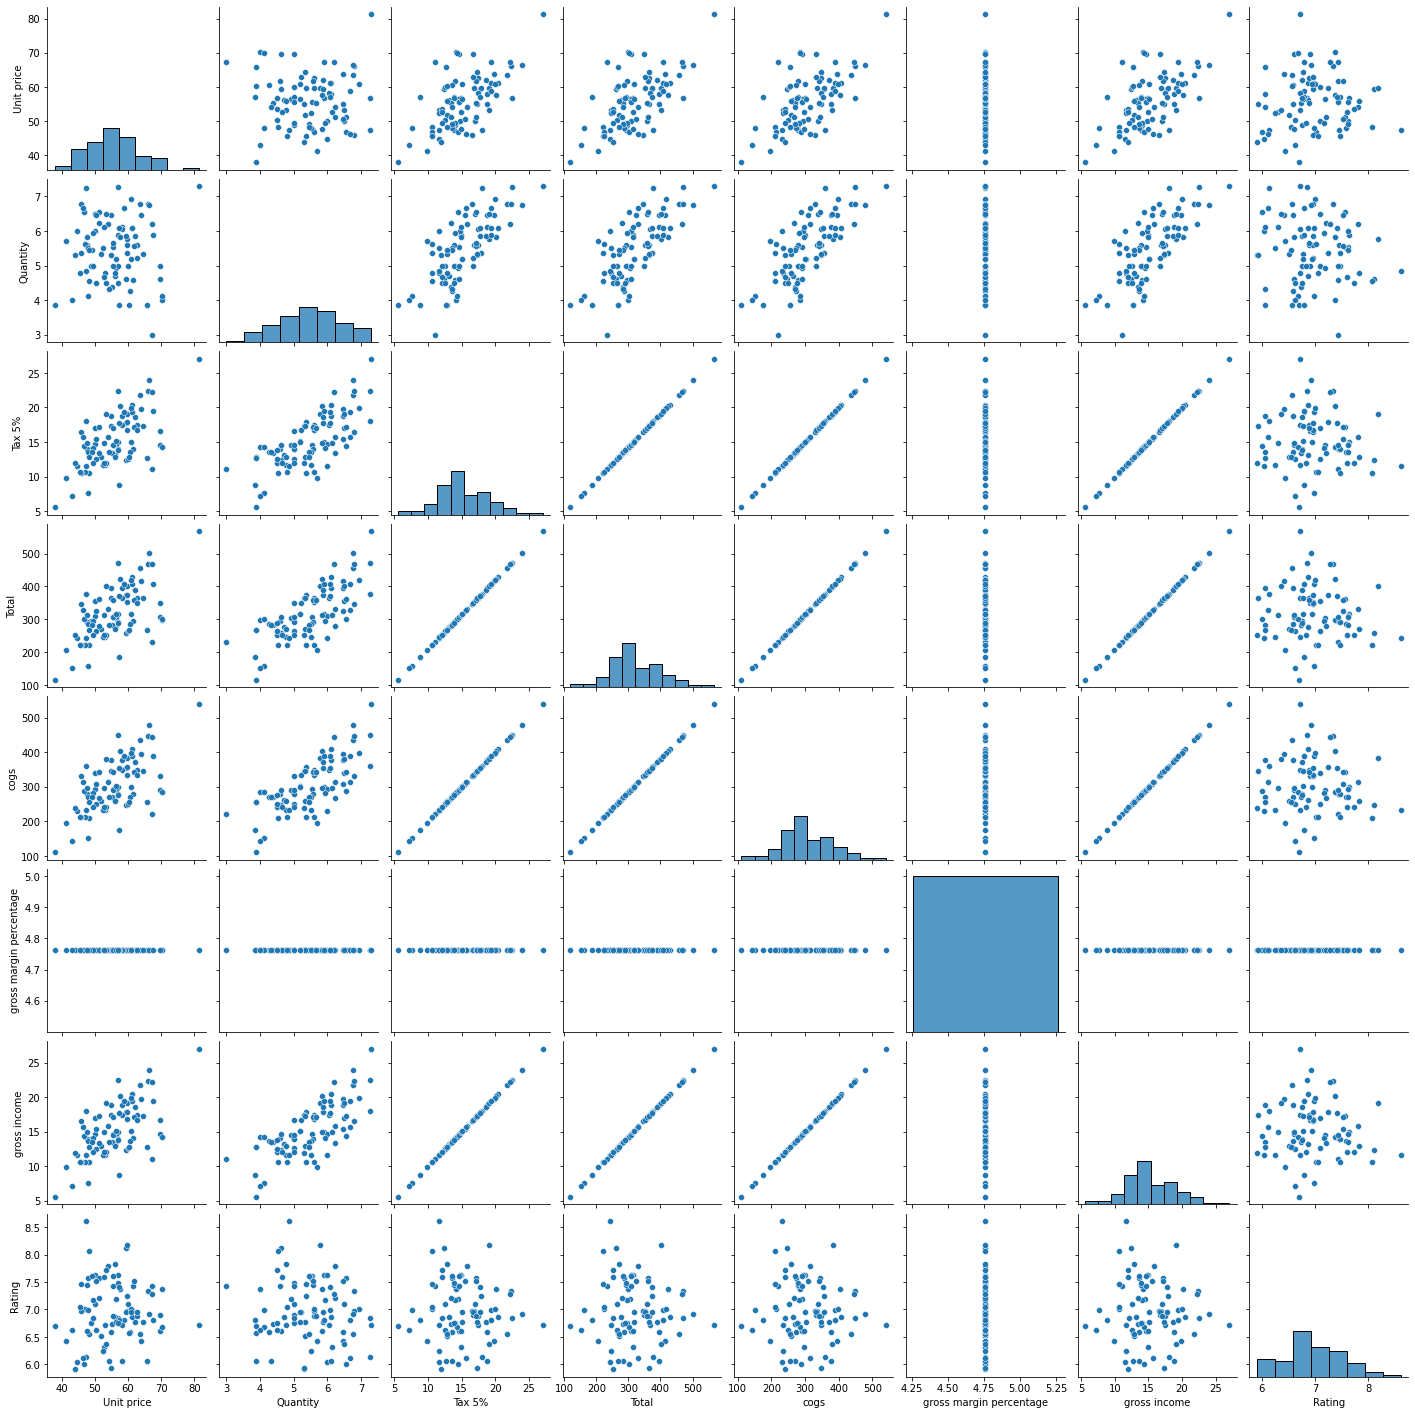

In [38]:
sns.pairplot(df)

# Task 4: Correlation Analysis

In [54]:
# Perform correlation analysis with Seaborn

<AxesSubplot:>

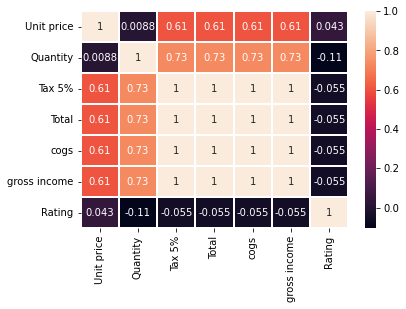

In [55]:
sns.heatmap(df.corr(), annot = True, cbar = True, linewidths=0.1,)